In [ ]:
#make sure fastai is up to date 
!curl -s https://course.fast.ai/setup/colab | bash

bash: line 1: syntax error near unexpected token `newline'
bash: line 1: `<!DOCTYPE html>'


In [ ]:
#read in standard data science libs
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
#import google drive package
from  google.colab import drive

In [ ]:
from fastai.vision import *

In [ ]:
# connect workbook to google drive folder to access images 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#save path to project folder 
root_path = 'gdrive/My Drive/AI_Projects/'

In [ ]:
#save path for balls folder that contains images and variable tags
proj_path = 'gdrive/My Drive/AI_Projects/animals/'

In [ ]:
#make folder names 
folders = ['cat', 'cow', 'deer', 'dog','elephant', 'horse', 'lion' 'monkey', 'panda', 'rabbit', 'tiger' 'zebra']

In [ ]:
#save fastai path 
p_path = Path(proj_path)

In [ ]:
# create image data bunch with 80/20 train test split 
np.random.seed(42)
data = ImageDataBunch.from_folder(p_path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packa

In [ ]:
data.classes

['cat',
 'cow',
 'deer',
 'dog',
 'elephant',
 'horse',
 'lion',
 'monkey',
 'panda',
 'rabbit',
 'tiger',
 'zebra']

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

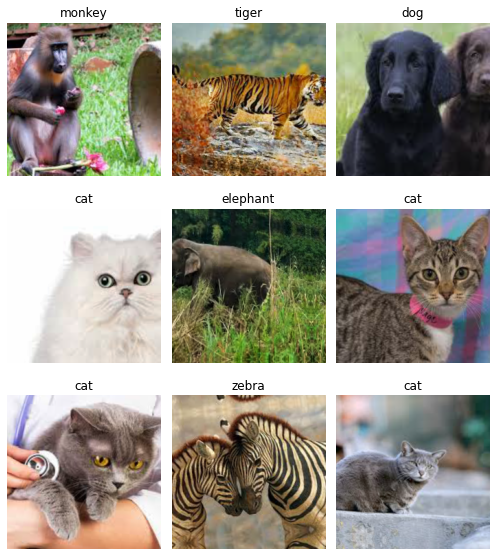

In [ ]:
#show sample of images 
data.show_batch(rows=3,figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['cat',
  'cow',
  'deer',
  'dog',
  'elephant',
  'horse',
  'lion',
  'monkey',
  'panda',
  'rabbit',
  'tiger',
  'zebra'],
 12,
 2768,
 691)

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
# train 8 epochs of the model 
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.545588,0.186531,0.057887,08:32
1,0.650600,0.122019,0.040521,00:54
2,0.387567,0.136914,0.041968,00:55
3,0.264386,0.139780,0.040521,00:56
4,0.198051,0.113961,0.031838,00:55
5,0.146281,0.106052,0.034732,00:55
6,0.115838,0.107295,0.036179,00:56
7,0.102031,0.105423,0.034732,00:56


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packa

In [ ]:
#save model
learn.save('model1_34', return_path=True)

PosixPath('gdrive/My Drive/AI_Projects/animals/models/model1_34.pth')

In [ ]:
# unfreeze model. Lets you train earlier layers 
learn.unfreeze()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packa

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


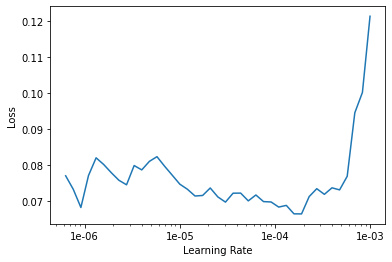

In [ ]:
#find optimal learning rates
learn.lr_find()
learn.recorder.plot()

In [ ]:
# fit whole model with new learning rates
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4), wd=.001)

epoch,train_loss,valid_loss,error_rate,time
0,0.091391,0.101083,0.036179,00:56
1,0.078948,0.101072,0.034732,00:57


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packa

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packa

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


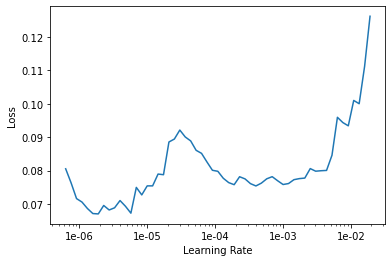

In [ ]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.save('model2_34')

In [ ]:
learn.load('model1_34')
interp = ClassificationInterpretation.from_learner(learn)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packa

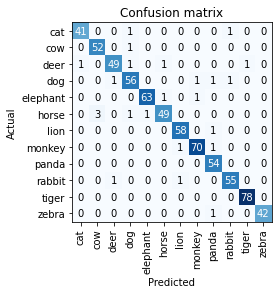

In [ ]:
#plot results of model on validation set 
interp.plot_confusion_matrix()

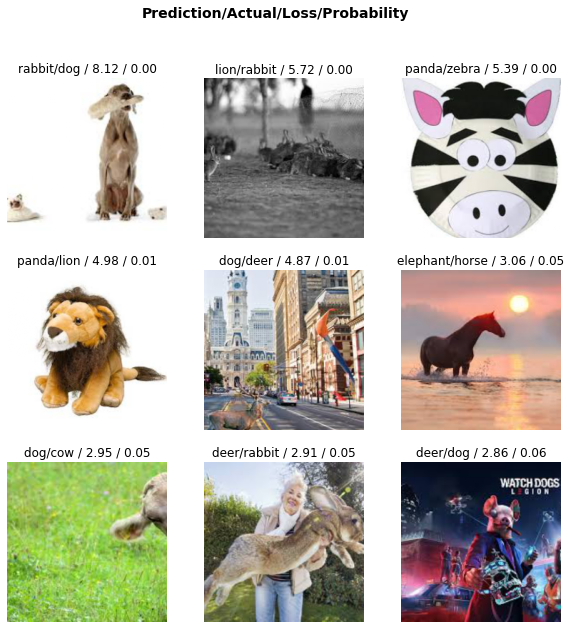

In [ ]:
# plot top losses (most wrong)
interp.plot_top_losses(9, figsize=(10,10))

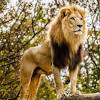

In [ ]:
img_lion= open_image(Path(root_path)/'animals'/'lion'/'ia_1100000069.jpg')
img_lion

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img_lion)
pred_class

Category tensor(6)